In [120]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

This is the regression problem dataset of price prediction

In [121]:
#loading the  training dataset
df=pd.read_csv("bigdatamart_train.csv")

In [122]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [123]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [124]:
#checking the name of diiferent columns in training  dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [125]:
#checking the datastructure type of the columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [126]:
#checking the dimensions of the training dataset
df.shape

(8523, 12)

In [127]:
#statistical summary of the  training dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [128]:
#pd.set_option('display.max_rows',None)   #allowing us to see all the rows of the dataset

In [129]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [130]:
#checking the null values in the training dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can see there are 1463 null values in 'Item_Weight' and 2410 null values in 'Outlet_Size'

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

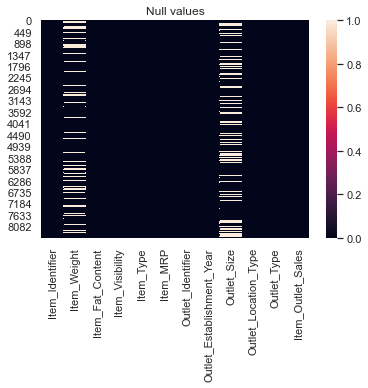

In [132]:
#visualising the null values in the training dataset
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show

In [133]:
#loading the test dataset
uf=pd.read_csv("bigdatamart_test.csv")

In [134]:
uf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [135]:
#checking the column names of test dataset
uf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [136]:
#checking the dimensions of the test dataset
uf.shape

(5681, 11)

In [137]:
#checking the null values in the test dataset
uf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can see there are 976 null values present in the "Item_weight" and 1606 null values present in the "Outlet_Size"






In [138]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [139]:
uf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [140]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [141]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [142]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [143]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [144]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [145]:
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [146]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [147]:
df["Item_Identifier"].unique()

m = len(pd.unique(df['Item_Identifier'])) 
  
print("No.of.unique values :",  
      m)




No.of.unique values : 1559


In [148]:

n = len(pd.unique(df['Item_Type'])) 
  
print("No.of.unique values :",  
      n)

No.of.unique values : 16


In [149]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [150]:
n = len(pd.unique(df['Item_Identifier'])) 
  
print("No.of.unique values :",  
      n)

No.of.unique values : 1559


# EXPLORATORY DATA ANALYSIS

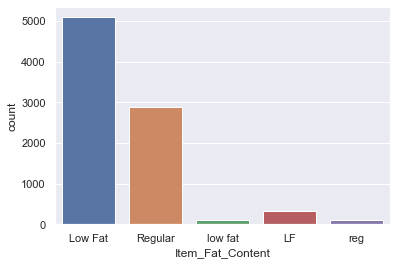

In [151]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(df['Item_Fat_Content'])

We can see our data mostly contains low fat item


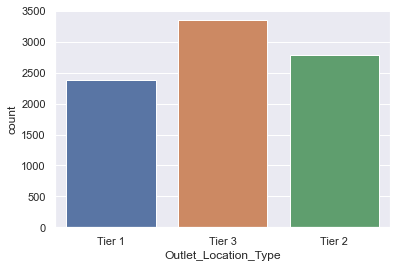

In [152]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(df['Outlet_Location_Type'])

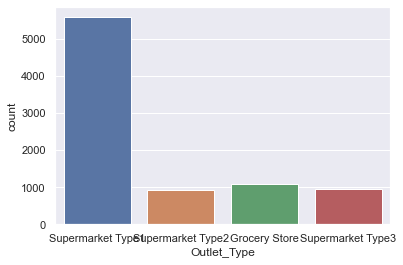

In [153]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(df['Outlet_Type'])

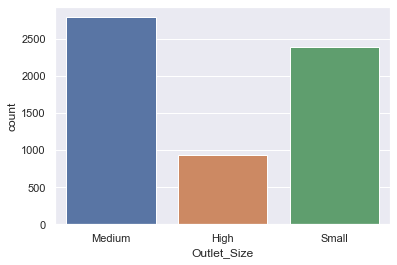

In [154]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(df['Outlet_Size'])

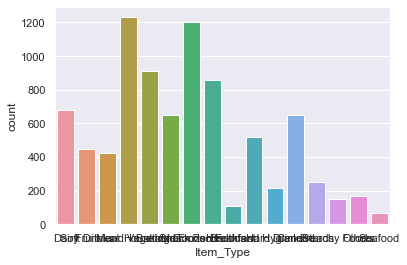

In [155]:

sns.set_theme(style="darkgrid")

ax = sns.countplot(df['Item_Type'] )

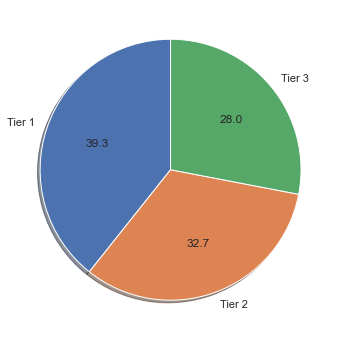

In [156]:
plt.figure(figsize = (6,6))
plt.pie(df['Outlet_Location_Type'].value_counts(), startangle = 90, labels = ['Tier 1', 'Tier 2','Tier 3'],shadow=True,autopct = '%.1f')
plt.show()

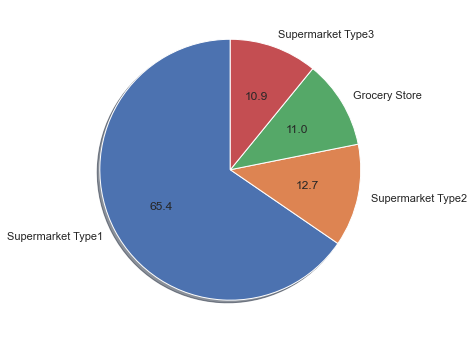

In [157]:
plt.figure(figsize = (6,6))
plt.pie(df['Outlet_Type'].value_counts(), startangle = 90, labels = ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'],shadow=True,autopct = '%.1f')
plt.show()

In [158]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [159]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [160]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


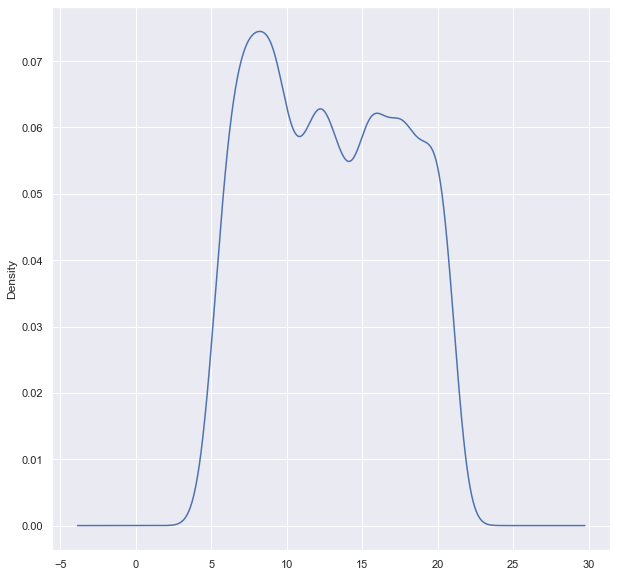

In [161]:
#checking the normal distribution of the  "Item_Weight"
df['Item_Weight'].plot(kind="kde",figsize=(10,10)) # age is normally distributed

In [162]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

We can see the data in the column of "Item_Weight " is not normally distributed hence we will replace nan values of this column by the Median

In [163]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [164]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [165]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode(),inplace=True)

In [166]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [167]:
#replacing the nan value of outlet size by the mode which is medium
df["Outlet_Size"].fillna("Medium", inplace = True)

In [168]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [169]:
uf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

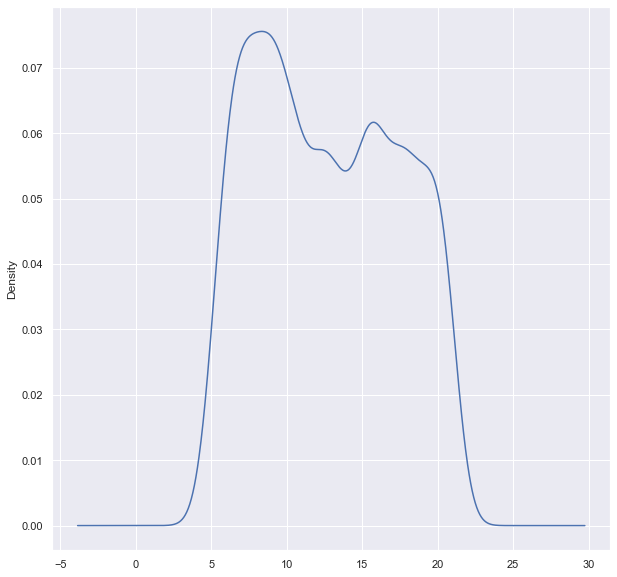

In [170]:
uf['Item_Weight'].plot(kind="kde",figsize=(10,10))

We can see distribution is not symmetric hence we will replace the nan values with Median

In [171]:
uf['Item_Weight'].fillna(uf['Item_Weight'].median(),inplace=True)

In [172]:
uf.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [173]:
uf['Outlet_Size'].fillna(uf['Outlet_Size'].mode(),inplace=True)

In [174]:
uf.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

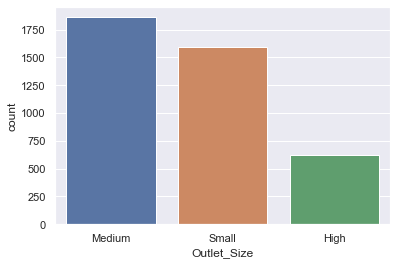

In [175]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(uf['Outlet_Size'])

In [176]:
uf["Outlet_Size"].fillna("Medium", inplace = True)

In [177]:
uf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [178]:
df.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


In [179]:
from sklearn.preprocessing import LabelEncoder

In [180]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [181]:
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in list:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [182]:
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in list:
    le=LabelEncoder()
    uf[i]=le.fit_transform(uf[i])

In [183]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [184]:
uf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.500,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,1,1,1


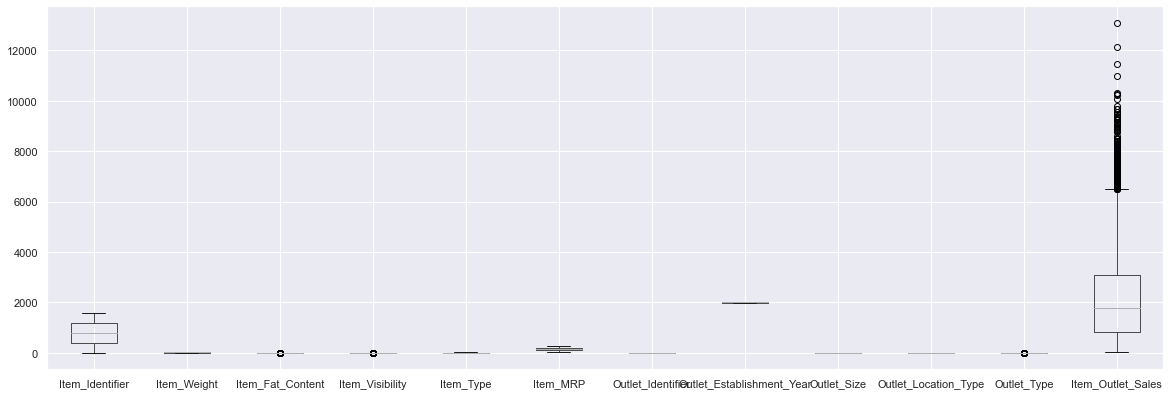

In [185]:
#Visualising the outliers by means of the box plot in training dataset
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

We can see there are considerable numbers of outliers present in the "Item_Outlet_Sales" hence we will remove this outlier

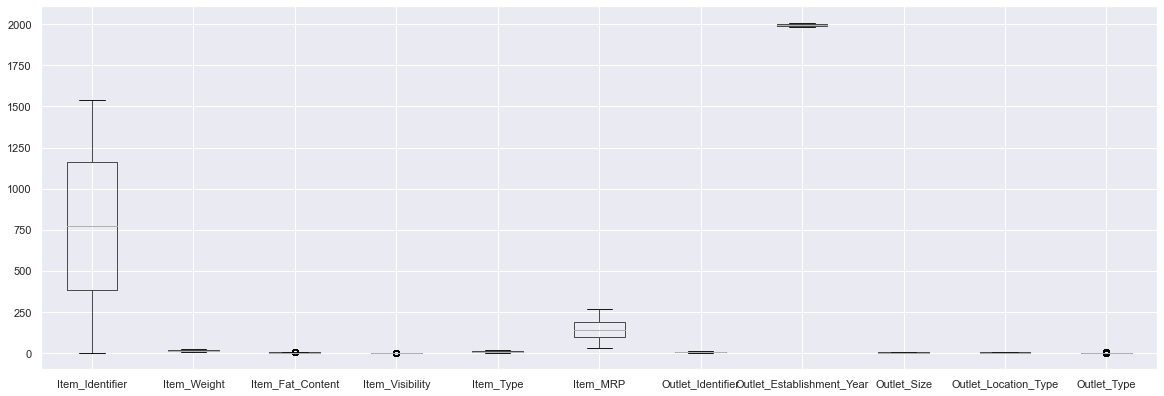

In [186]:
#Visualising the outliers by means of the box plot in test dataset
uf.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [187]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.121845
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [188]:
#Removing the outliers from the training dataset
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [189]:
new_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [190]:
new_df.shape

(8222, 12)

In [191]:
new_df.skew()

Item_Identifier             -0.011945
Item_Weight                  0.117321
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [192]:
uf.skew()

Item_Identifier             -0.000020
Item_Weight                  0.166489
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [193]:
#we see the skewness in the training  dataset. we will remove the skewness using the power_transform function
from sklearn.preprocessing import power_transform
df_a=power_transform(new_df)
df_new=pd.DataFrame(df_a,columns=new_df.columns)


In [194]:
df_new.skew()

Item_Identifier             -0.296537
Item_Weight                 -0.064569
Item_Fat_Content             0.017038
Item_Visibility              0.116318
Item_Type                   -0.166116
Item_MRP                    -0.112220
Outlet_Identifier           -0.215616
Outlet_Establishment_Year   -0.222552
Outlet_Size                 -0.044624
Outlet_Location_Type        -0.216697
Outlet_Type                  0.010506
Item_Outlet_Sales           -0.094680
dtype: float64

In [195]:
#we see the skewness in the testing  dataset. we will remove the skewness using the power_transform function
from sklearn.preprocessing import power_transform
df_b=power_transform(uf)
uf_new=pd.DataFrame(df_b,columns=uf.columns)


In [196]:
uf_new.skew()

Item_Identifier             -0.285982
Item_Weight                 -0.056794
Item_Fat_Content             0.032646
Item_Visibility              0.116776
Item_Type                   -0.167431
Item_MRP                    -0.111040
Outlet_Identifier           -0.214064
Outlet_Establishment_Year   -0.200515
Outlet_Size                 -0.042981
Outlet_Location_Type        -0.220642
Outlet_Type                  0.007830
dtype: float64

In [197]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.456916,-0.804600,-0.553191,-1.139908,-0.716214,1.641122,1.419282,0.031704,-0.288934,-1.376209,-0.135081,1.031404
1,-2.088767,-1.728707,1.161702,-1.030767,1.508583,-1.593026,-0.559497,1.451492,-0.288934,1.095295,1.054850,-1.249287
2,-0.155591,1.087225,-0.553191,-1.115560,0.684002,0.096173,1.419282,0.031704,-0.288934,-1.376209,-0.135081,0.219567
3,0.766642,1.440137,1.161702,-1.731270,-0.218734,0.706727,-1.817079,-0.093218,-0.288934,1.095295,-1.971736,-0.867126
4,1.089393,-0.900142,-0.553191,-1.731270,0.467128,-1.472654,-1.353569,-1.293670,-1.916231,1.095295,-0.135081,-0.594933
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,-0.842604,-1.457446,-0.553191,0.033454,1.308057,1.165647,-1.353569,-1.293670,-1.916231,1.095295,-0.135081,0.592678
8218,0.333778,-1.044412,1.161702,-0.212089,-1.923668,-0.450934,0.800887,0.424107,-0.288934,-0.126651,-0.135081,-1.095227
8219,1.196486,-0.477676,-0.553191,-0.536583,0.244916,-0.858592,0.478956,0.701080,1.390615,-0.126651,-0.135081,-0.417356
8220,-0.114352,-1.361191,1.161702,1.535383,1.308057,-0.537346,-0.559497,1.451492,-0.288934,1.095295,1.054850,0.062871


In [198]:
uf_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.757467,1.766675,-0.524089,-1.462069,1.301686,-0.472017,1.427400,0.048870,-0.293457,-1.373745,-0.123533
1,0.688618,-1.028242,3.194132,-0.448019,-0.712433,-0.835998,-0.931096,1.153252,-0.293457,-0.131020,-0.123533
2,1.313595,0.503383,-0.524089,0.871342,0.892240,1.525375,-1.809079,-0.075491,-0.293457,1.088300,-1.915753
3,0.173359,-1.302264,-0.524089,-1.175927,1.301686,0.290835,-0.931096,1.153252,-0.293457,-0.131020,-0.123533
4,0.910050,0.026944,1.015635,1.153823,-0.712433,1.424528,0.156937,-1.457044,-0.293457,1.088300,1.922271
...,...,...,...,...,...,...,...,...,...,...,...
5676,-1.224109,-0.455765,1.015635,-1.243150,1.301686,0.077563,1.122769,-0.197031,1.390590,-1.373745,-0.123533
5677,-1.009042,-1.221682,1.015635,1.453584,1.696978,0.504137,-0.548865,1.462369,-0.293457,1.088300,1.040210
5678,1.324234,-0.581654,-0.524089,0.397868,0.244553,-0.288074,0.810358,0.439518,-0.293457,-0.131020,-0.123533
5679,-0.472618,0.656304,1.015635,-1.760234,-0.978099,1.156802,-0.931096,1.153252,-0.293457,-0.131020,-0.123533


In [199]:
df_new.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03
mean,-7.478004e-17,-6.382770e-16,-1.731365e-16,-4.200065e-16,3.363887e-16,3.147567e-16,-1.120215e-16,-1.243633e-17,-9.130781e-17,5.226771e-16,2.462354e-16,4.453855e-16
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-2.163723e+00,-2.143834e+00,-2.621717e+00,-1.731270e+00,-1.923668e+00,-1.988614e+00,-1.817079e+00,-1.481122e+00,-1.916231e+00,-1.376209e+00,-1.971736e+00,-2.376549e+00
25%,-7.813579e-01,-8.045997e-01,-5.531914e-01,-7.871763e-01,-7.162139e-01,-7.065766e-01,-9.414420e-01,-1.293670e+00,-2.889337e-01,-1.376209e+00,-1.350811e-01,-7.331041e-01
50%,1.037610e-01,2.172444e-03,-5.531914e-01,-5.563736e-02,-2.187336e-01,1.013593e-01,1.465485e-01,3.170402e-02,-2.889337e-01,-1.266511e-01,-1.350811e-01,3.199575e-02
75%,8.615750e-01,7.883160e-01,1.161702e+00,7.889254e-01,6.840025e-01,7.458202e-01,8.008871e-01,7.010803e-01,1.390615e+00,1.095295e+00,-1.350811e-01,7.392057e-01
max,1.545800e+00,1.872464e+00,2.680964e+00,2.195827e+00,1.705888e+00,1.863653e+00,1.419282e+00,1.451492e+00,1.390615e+00,1.095295e+00,1.955483e+00,2.230040e+00


In [200]:
from sklearn.preprocessing import StandardScaler
obj= StandardScaler()
scale_df = obj.fit_transform(df_new) 

In [201]:
from sklearn.preprocessing import StandardScaler
obj= StandardScaler()
scale_uf = obj.fit_transform(uf_new) 

In [202]:
scale_df

array([[-1.45691592, -0.80459973, -0.55319135, ..., -1.37620889,
        -0.13508106,  1.03140409],
       [-2.08876736, -1.72870675,  1.1617017 , ...,  1.0952949 ,
         1.05485046, -1.24928721],
       [-0.15559082,  1.08722503, -0.55319135, ..., -1.37620889,
        -0.13508106,  0.2195667 ],
       ...,
       [ 1.19648612, -0.47767647, -0.55319135, ..., -0.1266511 ,
        -0.13508106, -0.41735569],
       [-0.11435156, -1.36119082,  1.1617017 , ...,  1.0952949 ,
         1.05485046,  0.06287063],
       [-1.85741534,  0.50328961, -0.55319135, ..., -1.37620889,
        -0.13508106, -0.82956924]])

In [203]:
df = pd.DataFrame(scale_df) 

In [204]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.456916,-0.804600,-0.553191,-1.139908,-0.716214,1.641122,1.419282,0.031704,-0.288934,-1.376209,-0.135081,1.031404
1,-2.088767,-1.728707,1.161702,-1.030767,1.508583,-1.593026,-0.559497,1.451492,-0.288934,1.095295,1.054850,-1.249287
2,-0.155591,1.087225,-0.553191,-1.115560,0.684002,0.096173,1.419282,0.031704,-0.288934,-1.376209,-0.135081,0.219567
3,0.766642,1.440137,1.161702,-1.731270,-0.218734,0.706727,-1.817079,-0.093218,-0.288934,1.095295,-1.971736,-0.867126
4,1.089393,-0.900142,-0.553191,-1.731270,0.467128,-1.472654,-1.353569,-1.293670,-1.916231,1.095295,-0.135081,-0.594933
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,-0.842604,-1.457446,-0.553191,0.033454,1.308057,1.165647,-1.353569,-1.293670,-1.916231,1.095295,-0.135081,0.592678
8218,0.333778,-1.044412,1.161702,-0.212089,-1.923668,-0.450934,0.800887,0.424107,-0.288934,-0.126651,-0.135081,-1.095227
8219,1.196486,-0.477676,-0.553191,-0.536583,0.244916,-0.858592,0.478956,0.701080,1.390615,-0.126651,-0.135081,-0.417356
8220,-0.114352,-1.361191,1.161702,1.535383,1.308057,-0.537346,-0.559497,1.451492,-0.288934,1.095295,1.054850,0.062871


In [205]:
uf=pd.DataFrame(scale_uf)

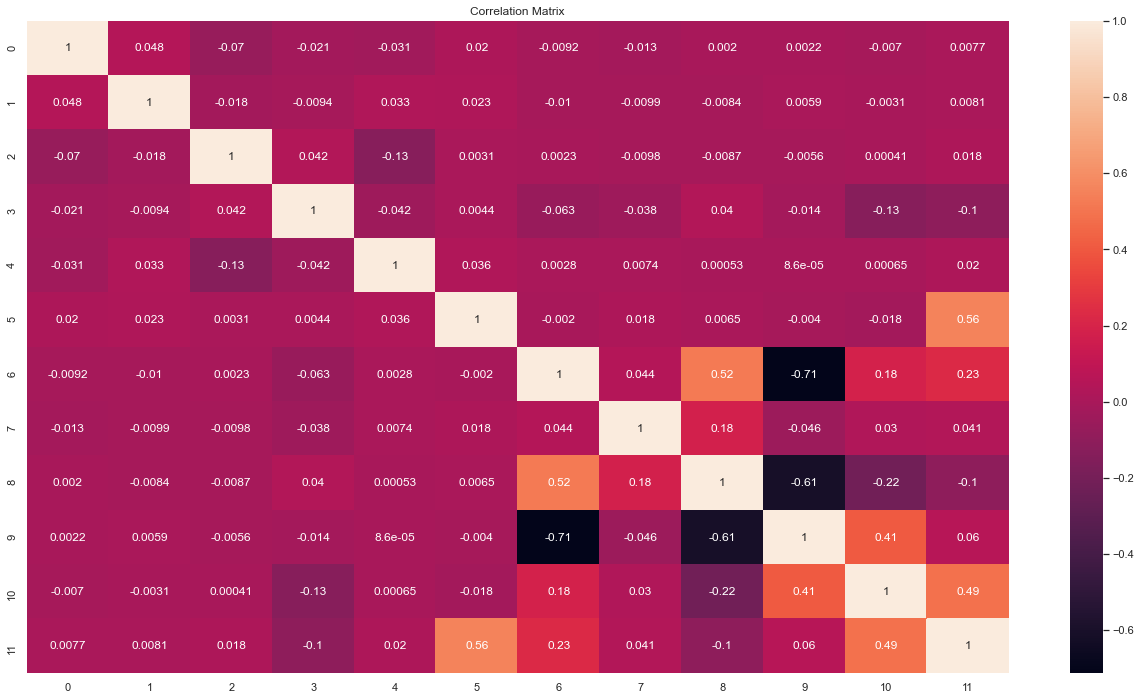

In [206]:
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

We can see that Item_Outlet_Sales has good correlation with Item_Outlet_Sales and Outlet_Type

In [207]:
corr_matrix=df.corr()
corr_matrix[11].sort_values(ascending=False)

11    1.000000
5     0.557471
10    0.490429
6     0.229242
9     0.059510
7     0.040773
4     0.019644
2     0.017941
1     0.008061
0     0.007655
8    -0.101305
3    -0.102427
Name: 11, dtype: float64

In [208]:
x=df.drop(11,axis=1)
y=df[11]

In [209]:
x

,0,1,2,3,4,5,6,7,8,9,10
0,-1.456916,-0.804600,-0.553191,-1.139908,-0.716214,1.641122,1.419282,0.031704,-0.288934,-1.376209,-0.135081
1,-2.088767,-1.728707,1.161702,-1.030767,1.508583,-1.593026,-0.559497,1.451492,-0.288934,1.095295,1.054850
2,-0.155591,1.087225,-0.553191,-1.115560,0.684002,0.096173,1.419282,0.031704,-0.288934,-1.376209,-0.135081
3,0.766642,1.440137,1.161702,-1.731270,-0.218734,0.706727,-1.817079,-0.093218,-0.288934,1.095295,-1.971736
4,1.089393,-0.900142,-0.553191,-1.731270,0.467128,-1.472654,-1.353569,-1.293670,-1.916231,1.095295,-0.135081
...,...,...,...,...,...,...,...,...,...,...,...
8217,-0.842604,-1.457446,-0.553191,0.033454,1.308057,1.165647,-1.353569,-1.293670,-1.916231,1.095295,-0.135081
8218,0.333778,-1.044412,1.161702,-0.212089,-1.923668,-0.450934,0.800887,0.424107,-0.288934,-0.126651,-0.135081
8219,1.196486,-0.477676,-0.553191,-0.536583,0.244916,-0.858592,0.478956,0.701080,1.390615,-0.126651,-0.135081
8220,-0.114352,-1.361191,1.161702,1.535383,1.308057,-0.537346,-0.559497,1.451492,-0.288934,1.095295,1.054850


In [210]:
y

0       1.031404
1      -1.249287
2       0.219567
3      -0.867126
4      -0.594933
          ...   
8217    0.592678
8218   -1.095227
8219   -0.417356
8220    0.062871
8221   -0.829569
Name: 11, Length: 8222, dtype: float64

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import scipy

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=40)

In [213]:
lm=LinearRegression()

In [214]:
lm.fit(x_train,y_train)

LinearRegression()

In [215]:
lm.coef_

array([ 6.61312835e-03, -4.39819365e-05,  1.75043602e-02, -2.74278444e-02,
       -9.48296232e-04,  5.67592183e-01,  5.22164247e-02,  2.62272854e-02,
       -1.44589926e-01, -2.01322413e-01,  5.38398882e-01])

In [216]:
lm.intercept_

-0.0026818788380172714

In [217]:
lm.score(x_train,y_train)

0.5947151452316702

In [218]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price",y_test)

Predicted result price: [ 0.63695413 -1.04575983 -0.19383016 ...  0.77608501  0.41713469
  1.74479271]
actual price 282    -0.266401
369    -0.431521
4770   -0.357521
7141   -1.764643
6502   -0.901054
          ...   
4656    0.380644
5076   -0.409476
3071    0.795841
7168   -0.000274
5618    1.359228
Name: 11, Length: 2714, dtype: float64


In [219]:
import scipy.stats
from sklearn.metrics import mean_absolute_error

In [220]:
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 0.5003010246203123
Mean squared error: 0.39360348825242253
Root Mean squared error: 0.6273782656838078


In [221]:
#r2 score -> coefficient of determination is the proportion of the variance in the dependent variable that is predictable from the independent variables.
#i.e change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6096759106394561


In [222]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_linreg = lin_reg.predict(x_test)

In [223]:

MSE=mean_squared_error(y_test,y_linreg)
MAE=mean_absolute_error(y_test,y_linreg)
r2=r2_score(y_test,y_linreg)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.6096759106394561
Root Mean Squared Error :  0.6273782656838078
Mean Absolute Error :  0.5003010246203123


In [230]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [231]:
rfr.score(x_train,y_train)

0.9484457912895943

In [232]:
rfr.score(x_test,y_test)

0.6623977191768375

In [233]:
from sklearn import metrics
acc_R=metrics.r2_score(y_test,y_pred)
acc_R

0.6623977191768375

In [234]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
dtr.score(x_train,y_train)
acc_R=metrics.r2_score(y_test,y_pred)
acc_R

0.35044077262411866

#We are getting best r2 score in RandomForestRegressor which is 0.66

In [235]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lin_reg,x,y,cv=5)
print("Cross validation score of Linear regression  model :",scr.mean())

Cross validation score of Linear regression  model : 0.598207232896765


In [237]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of Random Forest Regressor  model :",scr.mean())

Cross validation score of Random Forest Regressor  model : 0.6366793523047493


In [238]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of Decision Tree Regressor  model :",scr.mean())

Cross validation score of Decision Tree Regressor  model : 0.334018125924701


In [239]:
#Minimum difference in score and cross validation score is for the linear regressor model (0.0114)SO this is our best model

In [240]:
#ElasticNet is a combination of both lasso and Ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.5947150866020829


array([ 0.00656353, -0.        ,  0.01746159, -0.02739562, -0.00090382,
        0.56751005,  0.0523886 ,  0.02616693, -0.14443891, -0.20096325,
        0.53818146])

In [241]:
import joblib   #dumping our model
joblib.dump(rfr,"bigmart.pkl")

['bigmart.pkl']

In [242]:
#load model
mod=joblib.load("bigmart.pkl")

In [244]:
predicted_values=mod.predict(uf)

In [245]:
predicted_values

array([-0.26265596, -0.41597645, -1.03969586, ...,  0.06100058,
        1.0975987 , -0.39618197])